In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft,fft2, fftshift, fftfreq, ifft, ifftshift,ifft2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import skimage

In [ ]:
pi=np.pi

# Discrete time signal vs Analog signal
- **Analog signal** -> $x(t)$, $t$ is continious, $x(t)$ is continious
- **Discrete time signal** -> $x[n]$, $n$ is discrete, $x[n]$ is continious
- **Digital signal** -> $x[n]$, $n$ is discrete, $x[n]$ is discrete

For discrete signal, <span style="color:red">$n = 0,~1,~2,~\cdots,~(N-1)$</span> where $N = \mathrm{length}(x)$

In [ ]:
t_ct = np.linspace(0, 1, 1000)          # Linearly spaced 1000 points within 1 second,in real,
                                    # 1000 should be replaced by infinity
F=20 # 5 Hz sine wave
x_ct = np.sin(2*np.pi*F*t_ct)
# print(t)
print(x_ct)

[ 0.00000000e+00  1.25458030e-01  2.48933554e-01  3.68475395e-01
  4.82194534e-01  5.88293965e-01  6.85097090e-01  7.71074213e-01
  8.44866709e-01  9.05308500e-01  9.51444475e-01  9.82545587e-01
  9.98120372e-01  9.97922715e-01  9.81955739e-01  9.50471757e-01
  9.03968283e-01  8.43180172e-01  7.69068007e-01  6.82802917e-01
  5.85748078e-01  4.79437162e-01  3.65550112e-01  2.45886586e-01
  1.22337524e-01 -3.14473221e-03 -1.28577295e-01 -2.51978061e-01
 -3.71397034e-01 -4.84947137e-01 -5.90834035e-01 -6.87384489e-01
 -7.73072793e-01 -8.46544890e-01 -9.06639763e-01 -9.52407783e-01
 -9.83125718e-01 -9.98308158e-01 -9.97715189e-01 -9.81356181e-01
 -9.49489640e-01 -9.02619128e-01 -8.41485297e-01 -7.67054195e-01
 -6.80501991e-01 -5.83196397e-01 -4.76675049e-01 -3.62621214e-01
 -2.42837185e-01 -1.19215809e-01  6.28943332e-03  1.31695289e-01
  2.55020076e-01  3.74315000e-01  4.87694944e-01  5.93368262e-01
  6.89665089e-01  7.75063729e-01  8.48214700e-01  9.07962060e-01
  9.53361672e-01  9.83696

The printed values don't give us any insight.
Visualize Visualize Visualize!

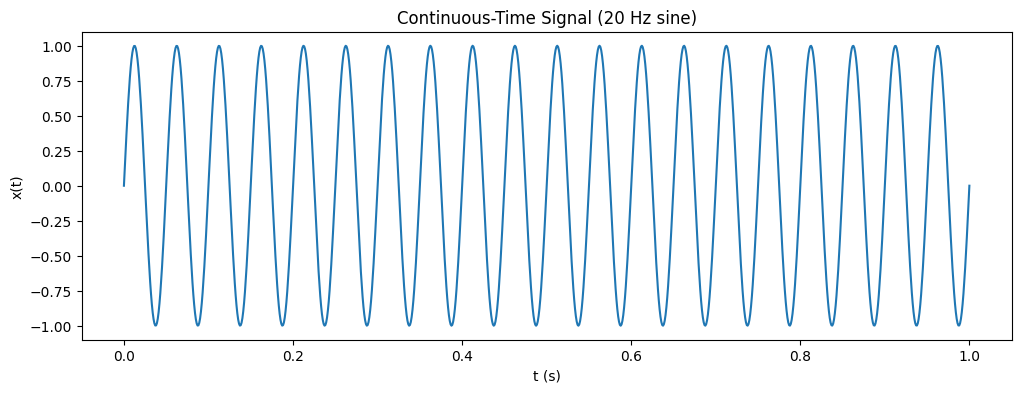

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(t_ct, x_ct)
plt.title("Continuous-Time Signal (20 Hz sine)")
plt.xlabel("t (s)");
plt.ylabel("x(t)");

We can get discrete signal by **sampling** the continuous signal.

The **sampling rate** ${f_s}$  defines how frequently we capture data points from a continuous signal.

We store values at regular intervals, determined by the **sampling period**:
$$ \
T_s = \frac{1}{f_s}$$

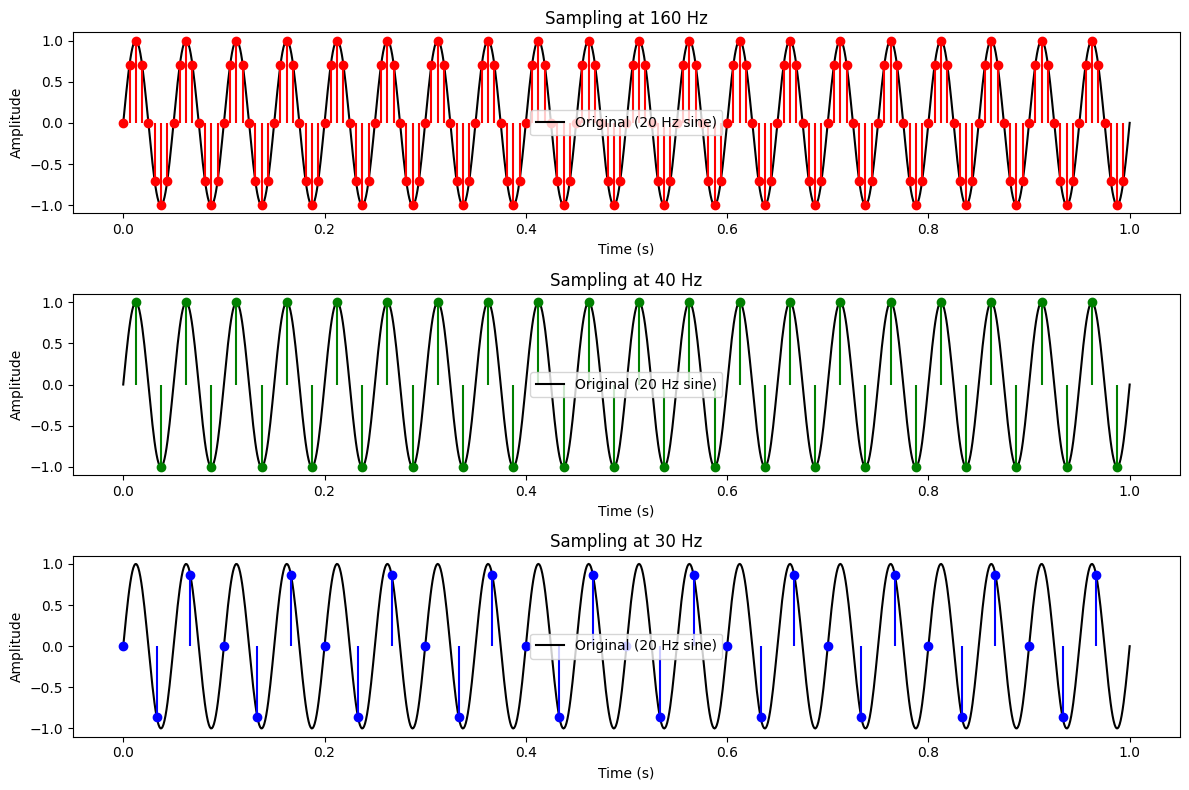

In [ ]:
# Sampling rates to compare
fs_list = [160, 40,30]  # In Hz
colors = ["r", "g", "b"]

plt.figure(figsize=(12,8))
for i, fs in enumerate(fs_list, 1):
    n = np.arange(0, 1, 1/fs)
    if fs == 40: # No need to worry about this if condition now
                  # You can comment this condition and see what happens
        t0 = 1/(4*20)
        n = n + t0
    x_n = np.sin(2*np.pi*F*n)

    plt.subplot(3,1,i)
    plt.plot(t_ct, x_ct, 'k', label="Original (20 Hz sine)")
    plt.stem(n, x_n, linefmt=colors[i-1]+"-", markerfmt=colors[i-1]+"o", basefmt=" ")


    plt.title(f"Sampling at {fs} Hz")
    plt.xlabel("Time (s)"); plt.ylabel("Amplitude")
    plt.legend()

plt.tight_layout()
plt.show()

We can reconstruct the signal from the sampled  version. Most of the cases, interpolation is used. But we have an advantage in matplotlib. If we use plt.plot instead of plt.steam, the signal is automatically interpolated.

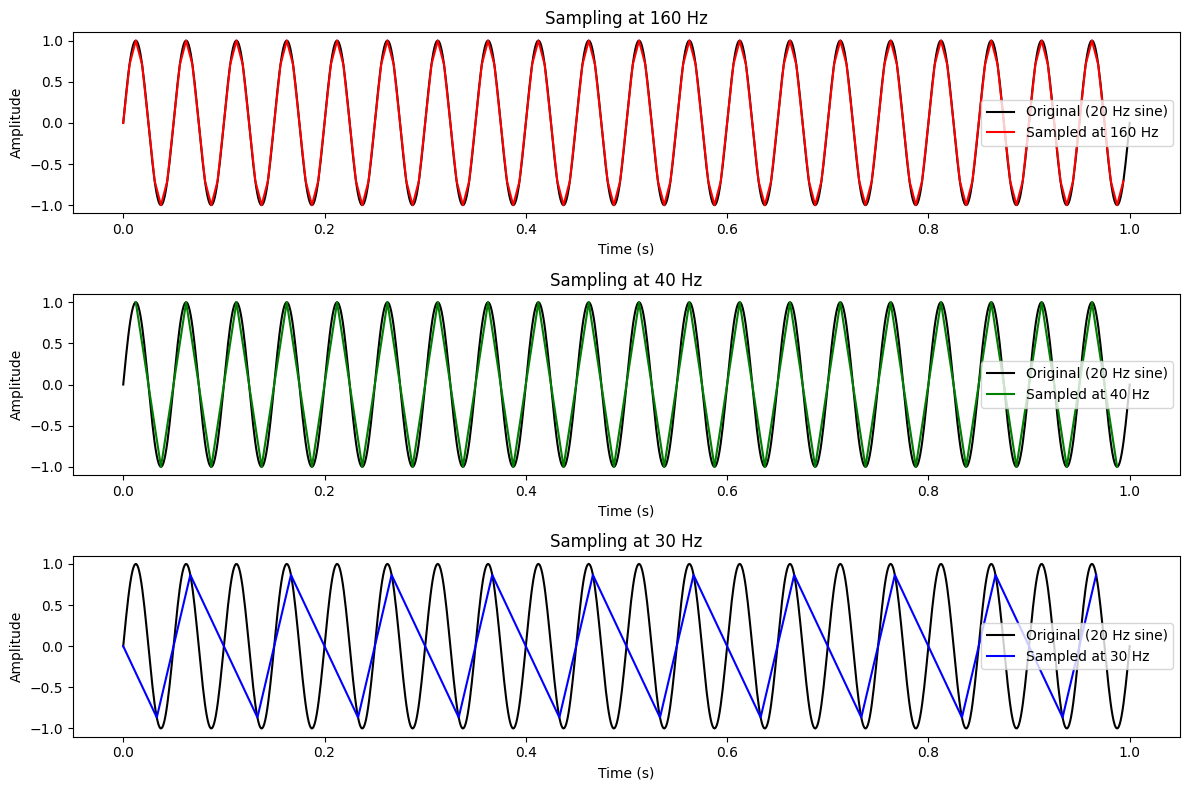

In [ ]:
plt.figure(figsize=(12,8))
for i, fs in enumerate(fs_list, 1):

    n = np.arange(0, 1, 1/fs)
    if fs == 40 : # No need to worry about this if condition now
                  # You can comment this condition and see what happens
        t0 = 1/(4*20)
        n = n + t0
    x_n = np.sin(2*np.pi*F*n)

    plt.subplot(3,1,i)
    plt.plot(t_ct, x_ct, 'k', label="Original (20 Hz sine)")
    plt.plot(n, x_n, colors[i-1], label=f"Sampled at {fs} Hz")


    plt.title(f"Sampling at {fs} Hz")
    plt.xlabel("Time (s)"); plt.ylabel("Amplitude")
    plt.legend()

plt.tight_layout()
plt.show()

Did you notice the third subfigure? It shows a lower-frequency version of the original signal — this is called an aliased signal.

According to the Nyquist theorem, the sampling rate must be at least twice the signal frequency to avoid aliasing.

Now, get introduced to a term named digital frequency. For discrete time period signals, digital frequency is defined as
$$f_{\mathrm{digital}} = \frac{F}{F_s}$$

where $F$ is the original frequency in $\mathrm{Hz}$ and $F_s$ is the sampling frequency in $\mathrm{Hz}$.

Unit of $f_{\mathrm{digital}}$ is $\mathrm{cycles/sample}$. We can represent a discrete/sampled signal as following:

Text(0, 0.5, '$x[n]$')

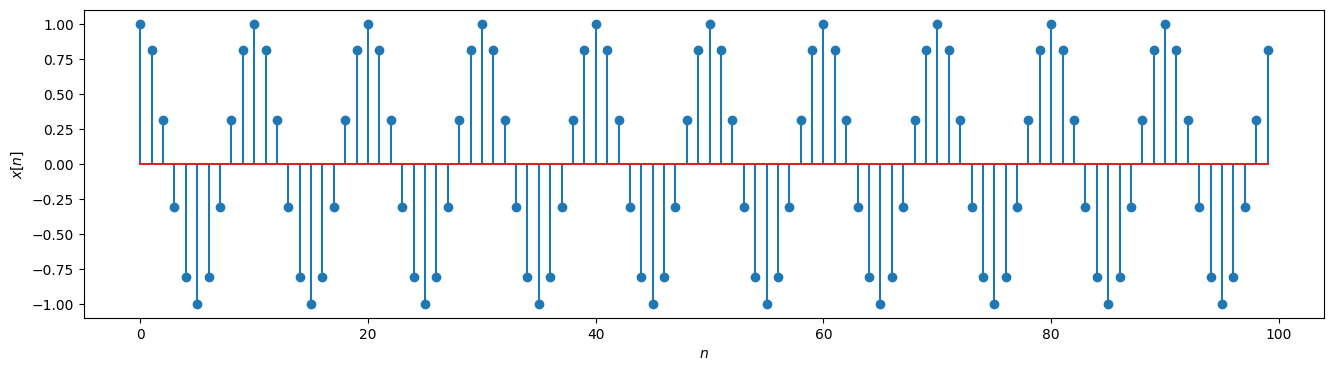

In [ ]:
F = 20 # Hz
Fs = 200 # Sampling Frequency, Hz
f = F/Fs # diqital frequency, cycles/sample.
# f must be -0.5 <= f < 0.5

N = 100
n = np.arange(N)
x = np.cos(2*pi*f*n)

plt.figure(figsize=(16, 4))
plt.stem(n, x)
plt.xlabel("$n$")
plt.ylabel("$x[n]$")

Another representation

Text(0, 0.5, '$x[n]$')

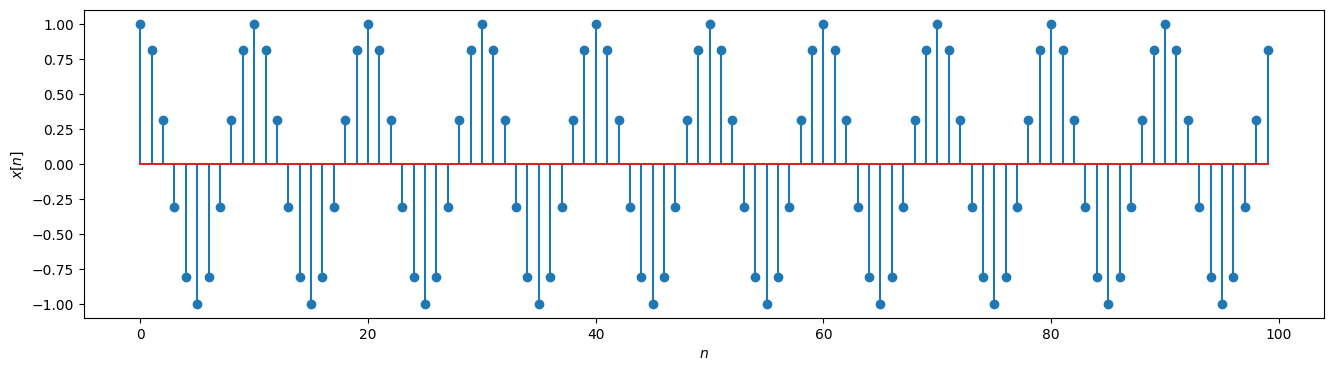

In [ ]:
n_cycles = 10
N = 100

f = n_cycles/N
n = np.arange(N)
x = np.cos(2*pi*f*n)

fig = plt.figure(figsize=(16, 4))
plt.stem(n, x)
plt.xlabel("$n$")
plt.ylabel("$x[n]$")

An interesting take

Text(0, 0.5, '$x[n]$')

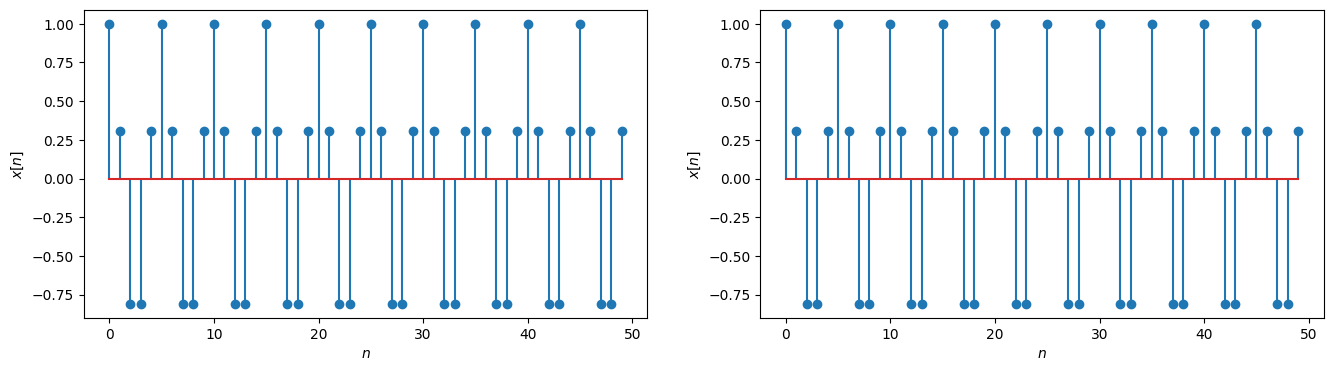

In [ ]:
n_cycles = 10
N = 50

f = n_cycles/N
n = np.arange(N)
x = np.cos(2*pi*f*n)

fig = plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.stem(n, x)
plt.xlabel("$n$")
plt.ylabel("$x[n]$")

n_cycles = 40
N = 50

f = n_cycles/N
n = np.arange(N)
x = np.cos(2*pi*f*n)

plt.subplot(1, 2, 2)
plt.stem(n, x)
plt.xlabel("$n$")
plt.ylabel("$x[n]$")

Though these two signals have different digital frequency but they look exactly the same. This is due to what we have learnt earlier, aliasing. If the digital frequency is greater than 0.5, it will be like a aliased low frequency version of frequency 1-f.
$$
\cos\!\big(2\pi(1-f)n\big)
= \cos(2\pi n - 2\pi f n)
= \cos(2\pi f n)
$$
because for integer n, $$cos(2\pi n)=1$$

# Idea behind Discrete Fourier Transform

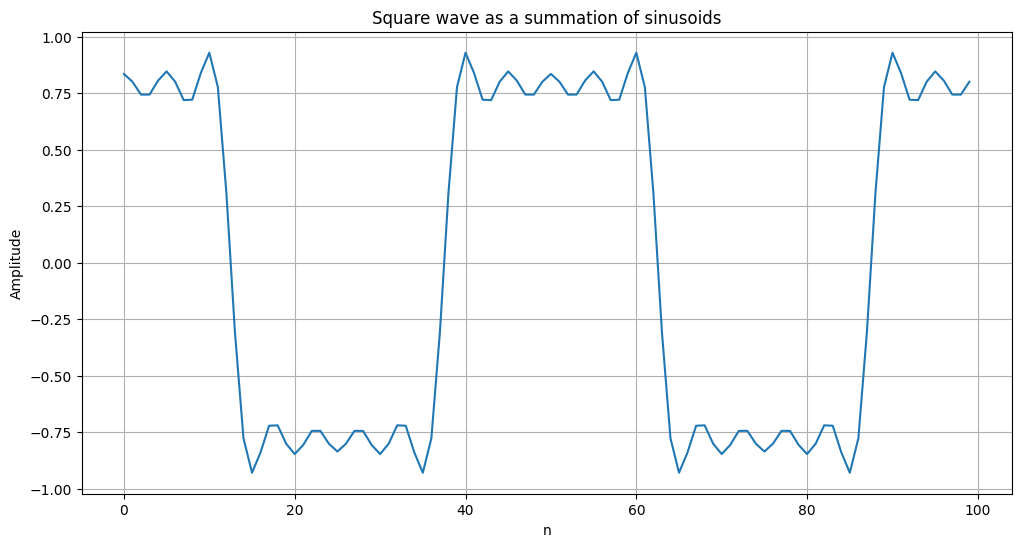

In [ ]:
n_cycles_0 = 2
N = 100

f0 = n_cycles_0/N

n = np.arange(N)
x = np.cos(2*pi*f0*n) \
     - (1/3)*np.cos(2*pi*(3*f0)*n)  \
     + (1/5)*np.cos(2*pi*(5*f0)*n)  \
     - (1/7)*np.cos(2*pi*(7*f0)*n) \
     + (1/9)*np.cos(2*pi*(9*f0)*n)


# Plotting the result
plt.figure(figsize=(12, 6))
plt.plot(n, x)
plt.title('Square wave as a summation of sinusoids')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Here, we can see that a square wave can be approximated as a sum of sinusoids of different frequencies. In fact, we can represent any signal as a sum of sinusoids of different frequencies.

# Discrete Fourier Transform

### Theory
Any signal of length $N$ can be represented as a sum of sinusoids with frequencies $f_0$, $2f_0$, $\cdots$, $(N-1)f_0$, where $f_0 = \frac{1}{N}$.

So from $x[n] = [x_0,~x_1,~\cdots~x_{N-1}]$ we get $X[k] = [X_0,~X_1,~\cdots~X_{N-1}]$, where $X_k$ represents the "magnitude" (i.e. strength) and "phase" (i.e. angle or time delay) of sinusoid with frequence $f_k = kf_0 = \frac{k}{N}$

The Discrete Fourier Transform (DFT) is defined as:

$$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j\frac{2\pi}{N}kn}
$$

where:
- X[k] is the DFT of the signal x[n]
- N is the total number of samples
- k = 0, 1, ... , N-1
- \$$ ( j = \sqrt{-1} ) (imaginary \ unit) $$


### Demonstration

In [ ]:
def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            angle = -2j * np.pi * k * n / N
            X[k] += x[n] * np.exp(angle)
    return X


In [ ]:
def dft_frequencies(N):
    delta_f = 1 / N

    # Frequencies: 0 to fs (with negative frequencies in second half)
    freqs = np.array([k * delta_f for k in range(N)])

    # Shift second half to represent negative frequencies
    for k in range(N):
        if k >= N // 2:
            freqs[k] -= 1
    return freqs


Can you guess why the frequencies are declared as f-1 when k>=N//2 ? Think yourself for a moment.

Yes, you have guessed it right. It is related to what we have seen earlier, "An interesting take". For k>=N//2 , the digital frequency becomes greater than 0.5 and it gives us same information as the frequency 1-f.
Instead of (1-f), we are using (f-1) here which is negative. Negative freuency arises due to the complex conjugate symmetry of the transform for real-valued signals. These negative frequencies represent the same information as the positive ones but in the opposite direction.  To get more insights, explore the Euler theorem and sin/cos representation with the help of Euler theorem.

In [ ]:
n_cycles = 5
N = 20

f = n_cycles/N
n = np.arange(N)
x = np.cos(2*np.pi*f*n)
# Manual DFT
X_manual = dft(x)
freqs = dft_frequencies(N)
print("Manual DFT:", np.round(X_manual, 2))
print(freqs)

Manual DFT: [-0.+0.j -0.-0.j -0.-0.j -0.-0.j -0.+0.j 10.-0.j -0.-0.j  0.-0.j  0.-0.j
  0.-0.j  0.-0.j -0.+0.j  0.-0.j  0.+0.j  0.-0.j 10.+0.j -0.-0.j -0.+0.j
 -0.-0.j -0.-0.j]
[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45 -0.5  -0.45
 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05]


In [ ]:
# NumPy's FFT (same math, faster)
X_fft = fft(x)
fk=fftfreq(N)
print(fk)
print("FFT:", np.round(X_fft, 2))

[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45 -0.5  -0.45
 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05]
FFT: [-0.+0.j -0.-0.j -0.+0.j -0.-0.j -0.+0.j 10.-0.j  0.+0.j  0.-0.j  0.-0.j
  0.-0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j 10.+0.j -0.-0.j  0.+0.j
 -0.+0.j -0.+0.j]


In [ ]:
n_cycles = 5
N = 100

f = n_cycles/N
n = np.arange(100)
x = 5*np.cos(2*np.pi*f*n)

# Fast Fourier Transform
X_fft = fft(x)
#print(X_fft)

X_fft = fftshift(X_fft) # to shift the freuqncies from [0, 1] range to [-0.5, 0.5] range
X_fft = X_fft/N # Normalization

fk = fftfreq(N)
fk = fftshift(fk)




Normalization isn't part of the standard DFT equation, so it's not strictly necessary. You can comment out that line and observe how the output changes.

Do you get any insight from the values?
Remember : visualize visualize visualize!

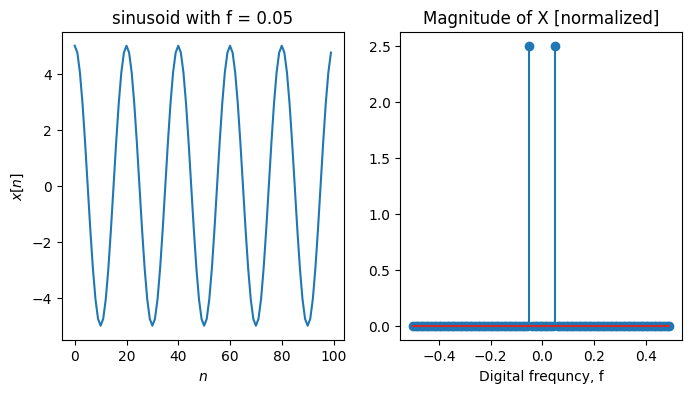

In [ ]:

fig = plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(n, x)
plt.xlabel("$n$")
plt.ylabel("$x[n]$")
plt.title(f"sinusoid with f = {f}")

plt.subplot(1, 2, 2)
plt.stem(fk, np.abs(X_fft))
plt.xlabel("Digital frequncy, f")
plt.title("Magnitude of X [normalized]")



plt.show()

Can you guess why the magnitude of the freuency components is half of the amplitude of the signal?

# Helper Functions




In [ ]:
def perform_fft(x, N):
    X = fft(x)
    X = fftshift(X)
    X = X/N # Normalization

    fk = fftfreq(N)
    fk = fftshift(fk)

    return X, fk

def plot_sig_and_fft(x, n, X, fk):
    fig = plt.figure(figsize=(16, 8))

    plt.subplot(1, 2, 1)
    plt.plot(n, x)
    plt.xlabel("$n$")
    plt.ylabel("$x[n]$")
    plt.title(f"Signal in time domain")

    plt.subplot(1, 2, 2)
    plt.stem(fk, np.abs(X))
    plt.xlabel("Digital frequncy, f")
    plt.title("Magnitude of X [normalized]")

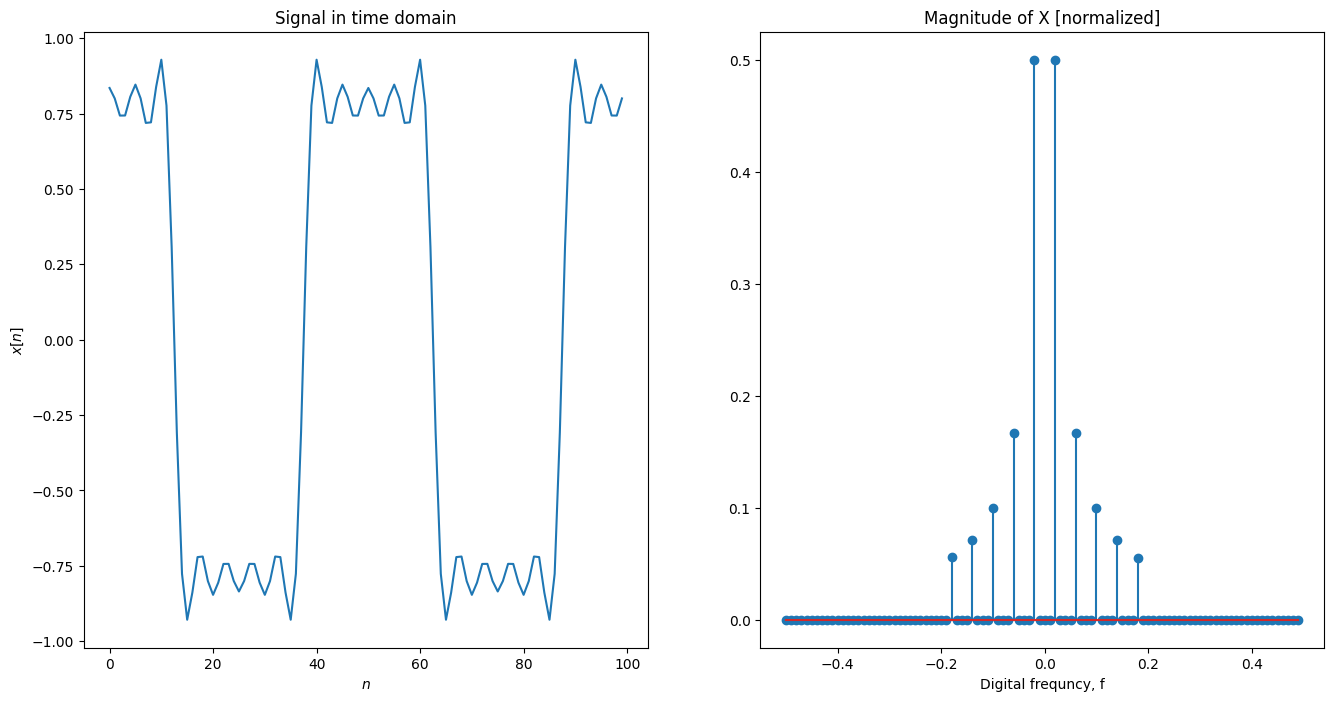

In [ ]:
n_cycles_0 = 2
N = 100

f0 = n_cycles_0/N

n = np.arange(N)
x = np.cos(2*pi*f0*n) \
     - (1/3)*np.cos(2*pi*(3*f0)*n)  \
     + (1/5)*np.cos(2*pi*(5*f0)*n)  \
     - (1/7)*np.cos(2*pi*(7*f0)*n) \
     + (1/9)*np.cos(2*pi*(9*f0)*n)
X, fk = perform_fft(x, N)
plot_sig_and_fft(x, n, X, fk)

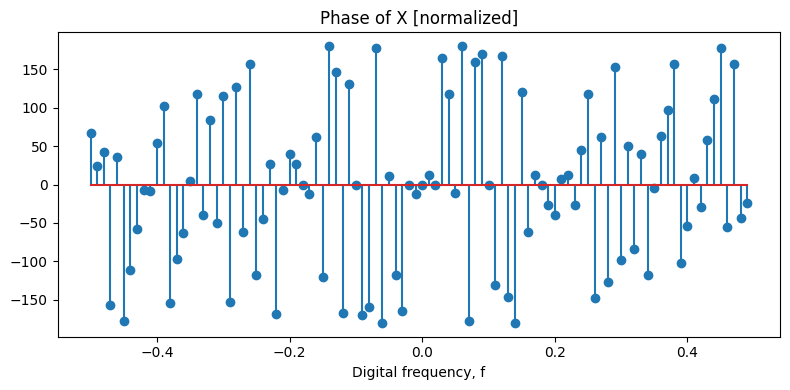

In [ ]:
fig = plt.figure(figsize=(8, 4))


plt.stem(fk, np.angle(X)*(180/np.pi))
plt.xlabel("Digital frequency, f")
plt.title("Phase of X [normalized]")

plt.tight_layout()
plt.show()

# Reconstruction using IFFT


## Inverse Discrete Fourier Transform (IDFT)

The Inverse Discrete Fourier Transform (IDFT) reconstructs a time-domain signal from its frequency-domain representation. It is defined as:



$
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] \cdot e^{j 2\pi kn/N}
$



Where:
- x[n] is the reconstructed time-domain signal
- X[k] is the DFT of the signal
- N is the total number of samples
- j = $\sqrt{-1}$  is the imaginary unit


In [ ]:
def perform_ifft(X, N):
    X_ishift = ifftshift(X)
    x_recon = ifft(X_ishift)
    x_recon = np.real(x_recon)*N #Multiplying extra N because we normalized during FFT

    n = np.arange(N)
    if x_recon.shape[0] > N:
        x_recon = x_recon[:N]

    return x_recon, n

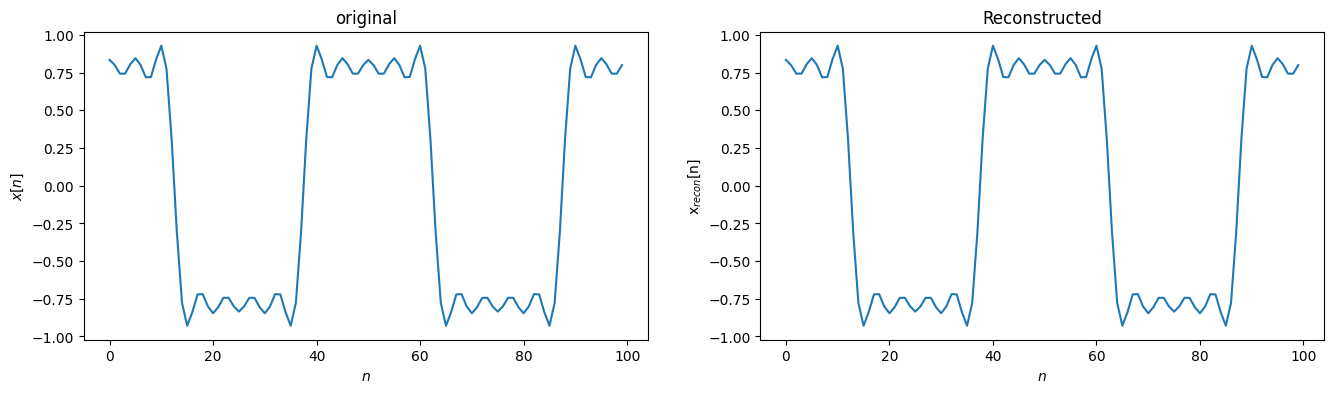

In [ ]:
x_recon, n_recon = perform_ifft(X, N)
fig = plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(n, x)
plt.xlabel("$n$")
plt.ylabel("$x[n]$")
plt.title(f"original")

plt.subplot(1, 2, 2)
plt.plot(n_recon, x_recon)
plt.xlabel("$n$")
plt.ylabel("x$_{recon}$[n]")
plt.title("Reconstructed")
plt.show()

# Common DFT Pair

$$DFT\left(\delta[n]\right) = 1$$

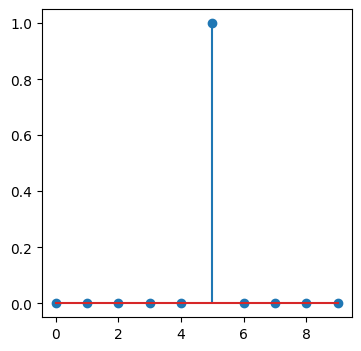

In [ ]:
N = 10
n = np.arange(N)

x = np.zeros_like(n)
x[N//2] = 1

fig = plt.figure(figsize=(4, 4))
plt.stem(n, x)
plt.show()

In [ ]:
def plot_sig_and_fft(x, n, X, fk):
    fig = plt.figure(figsize=(16, 8))

    plt.subplot(1, 2, 1)
    plt.stem(n, x)
    plt.xlabel("$n$")
    plt.ylabel("$x[n]$")
    plt.title(f"Signal in time domain")

    plt.subplot(1, 2, 2)
    plt.stem(fk, np.abs(X))
    plt.xlabel("Digital frequncy, f")
    plt.title("Magnitude of X [normalized]")

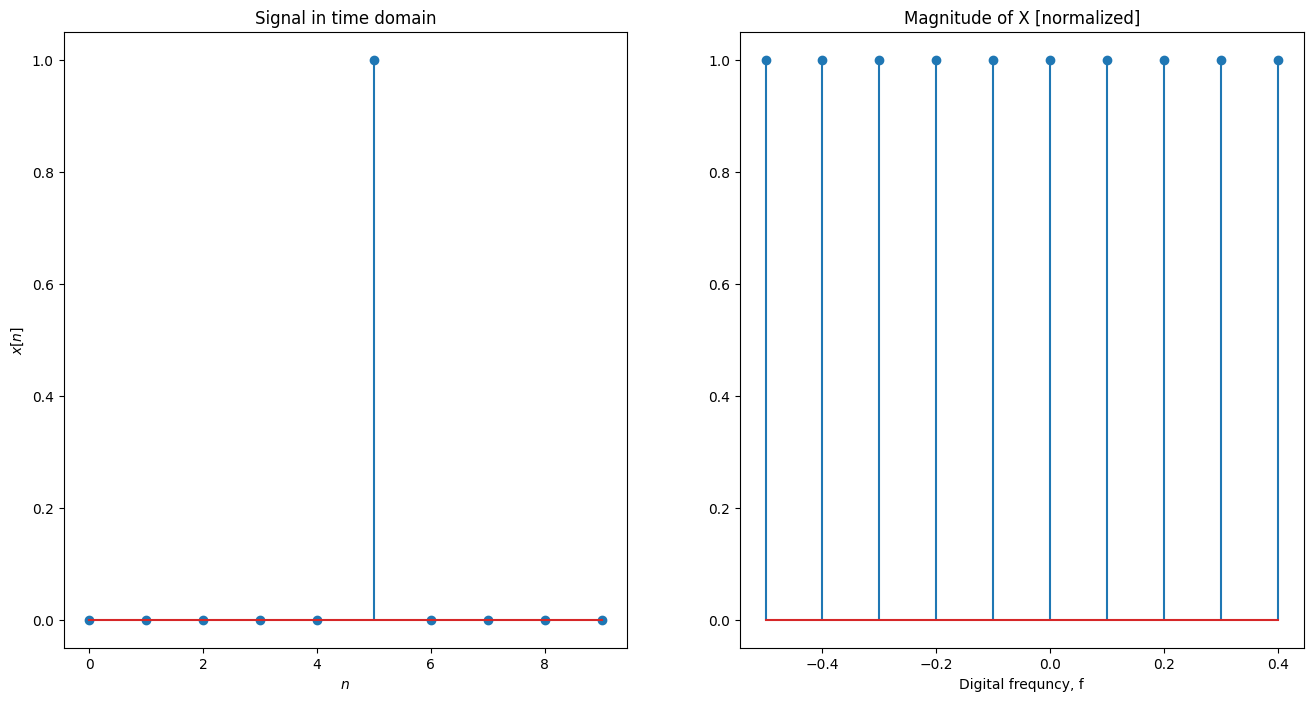

In [ ]:
X, fk = perform_fft(x, N)
plot_sig_and_fft(x, n, X*N, fk)

At this stage, you can think of sampling as multiplying the continuous signal by a train of impulses at discrete time intervals. In the frequency domain, this operation produces multiple copies of the original spectrum, spaced apart by the sampling frequency. If the sampling frequency is not sufficiently high, these spectral copies overlap — a phenomenon known as aliasing. To avoid this, the sampling rate must be at least twice the highest frequency component of the signal, as dictated by the Nyquist theorem.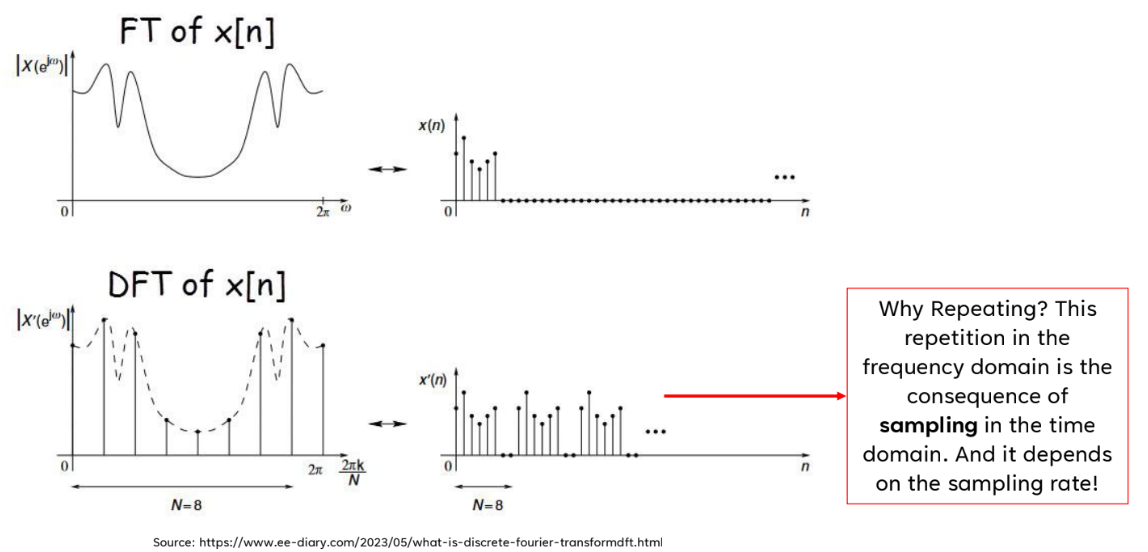
---

*Image Source: lecture slide of SDQ Sir*

##  2D Discrete Fourier Transform (DFT)

The 2D DFT extends the 1D DFT to two dimensions, making it ideal for analyzing 2D signals such as images. It transforms spatial-domain data (pixel intensities) into the frequency domain, capturing frequency components in both horizontal and vertical directions.

###  Formula



$$
F(u,v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x,y) \cdot e^{-j2\pi\left(\frac{ux}{M} + \frac{vy}{N}\right)}
$$


- \( f(x,y) \): Intensity at spatial position \( (x,y) \)
- \( F(u,v) \): Frequency component at \( (u,v) \)
- \( u, v \): Horizontal and vertical frequency indices
- \( M, N \): Dimensions of the image (width and height)


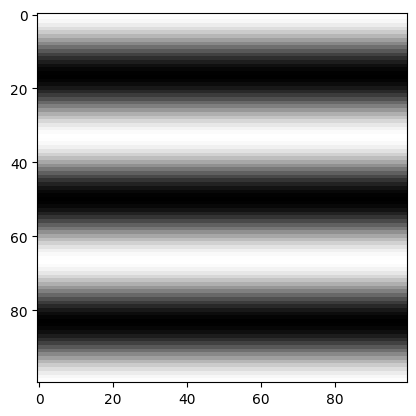

In [ ]:
n_cycle_1 = 0
n_cycle_2 = 3

N = 100
M = 100

f1 = n_cycle_1/N
f2 = n_cycle_2/M

n, m = np.meshgrid(np.arange(N), np.arange(M))
x = np.cos(2*pi*f1*n + 2*pi*f2*m)
plt.figure()
plt.imshow(x, cmap="gray")

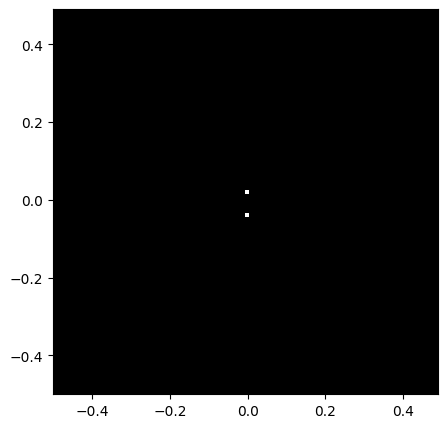

In [ ]:
from numpy.fft import fft, fft2, fftshift, fftfreq
# Compute DFT
X = fft2(x)

# Center the magnitude response to (M/2, N/2)
X_centered = fftshift(X)

# Frequencies
u = fftshift(fftfreq(N))
v = fftshift(fftfreq(M))

u, v = np.meshgrid(u, v)
plt.figure(figsize=(5,5))
plt.imshow(np.log(1+(np.abs(X_centered))), cmap="gray",extent=(u.min(), u.max(), v.min(), v.max())
)
# We often use log scale, adding 1 to avoid log 0 condition.

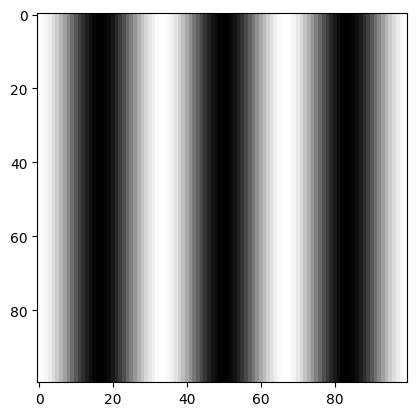

In [ ]:
n_cycle_1 = 3
n_cycle_2 = 0

N = 100
M = 100

f1 = n_cycle_1/N
f2 = n_cycle_2/M

n, m = np.meshgrid(np.arange(N), np.arange(M))
x = np.cos(2*pi*f1*n + 2*pi*f2*m)
plt.figure()
plt.imshow(x, cmap="gray")

In [ ]:
from numpy.fft import fft, fft2, fftshift, fftfreq
# Compute DFT
X = fft2(x)
# X=fftshift(X) #keep this line as comment to observe the significance of fftshift

# Frequencies
u = fftfreq(N)
v = fftfreq(M)

# u=fftshift(u)#keep this line as comment to observe the significance of fftshift
# v=fftshift(v)#keep this line as comment to observe the significance of fftshift

u, v = np.meshgrid(u, v)

(np.float64(-0.5), np.float64(0.49), np.float64(-0.5), np.float64(0.49))

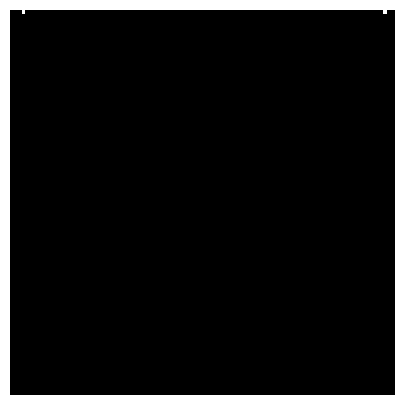

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(np.log(1+(np.abs(X))), cmap="gray",extent=(u.min(), u.max(), v.min(), v.max())
)
plt.axis('off')
# We often use log scale, adding 1 to avoid log 0 condition.

In 2D DFT, by default, the low-frequency components (representing overall trends or smooth
variations) are at the corners of the spectrum, while the high-frequency components
(representing fine details or sharp edges) are distributed outward from the origin. This default
layout can be unintuitive for human analysis. So, we shift the origin to the center of the frequency spectrum in the 2D DFT for
visualization and interpretation purposes. Placing the zero frequency (DC component) in the
middle makes it easier to identify and analyze low frequencies.

# Frequency along x and y

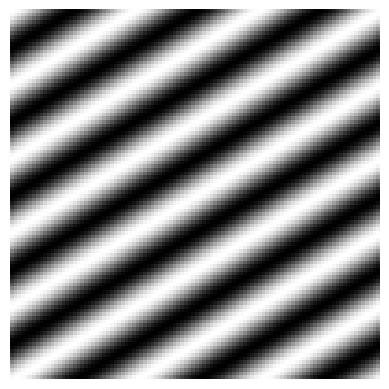

In [ ]:
n_cycle_1 = 3
n_cycle_2 = 5

N = 100
M = 100

f1 = n_cycle_1/N
f2 = n_cycle_2/M

n, m = np.meshgrid(np.arange(N), np.arange(M))

x = np.cos(2*pi*f1*n + 2*pi*f2*m)
plt.figure()
plt.axis('off')

plt.imshow(x, cmap="gray")

In [ ]:
def perform_fft2(x, M, N):
    X = fft2(x)
    X = fftshift(X)

    u = fftshift(fftfreq(M))
    v = fftshift(fftfreq(N))

    u, v = np.meshgrid(u, v)

    return X, u, v

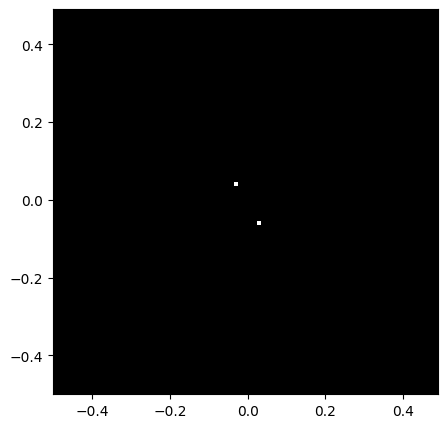

In [ ]:
X, u, v = perform_fft2(x, M, N)

plt.figure(figsize=(5,5))
plt.imshow(np.log(1+np.abs(X)), cmap="gray",extent=(u.min(), u.max(), v.min(), v.max())
)

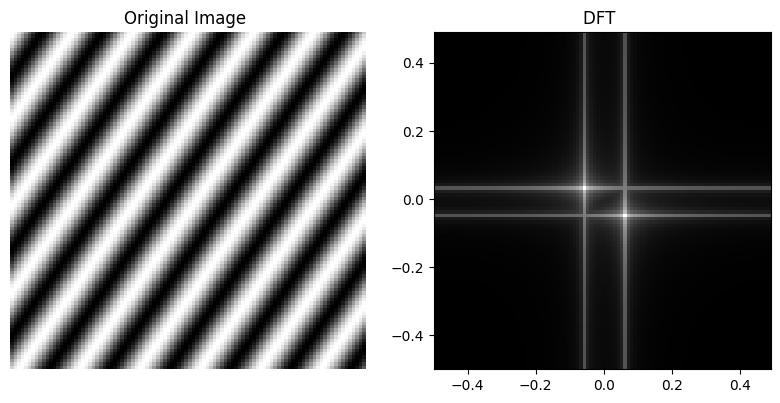

In [ ]:
n_cycle_1 = 5.9
n_cycle_2 =3.9

N = 100
M = 100

f1 = n_cycle_1 / N
f2 = n_cycle_2 / M

# Create 2D coordinate grid
n, m = np.meshgrid(np.arange(N), np.arange(M))

x = np.cos(2 * pi * f1 * n + 2 * pi * f2 * m)


# Display original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(x, cmap='gray', aspect='auto')
plt.title("Original Image ")
plt.axis('off')

X,u,v =perform_fft2(x,M,N)

# Display frequency domain
plt.subplot(1, 2, 2)
plt.imshow(np.log(1+np.abs(X)), cmap='gray',extent=(u.min(), u.max(), v.min(), v.max())
)
plt.title("DFT ")
# plt.axis('off')

plt.tight_layout()
plt.show()


When a signal does not complete an integer number of cycles inside the finite sampling window, discontinuities at the boundaries occur. These discontinuities introduce many additional frequency components, appearing as spectral leakage around the main peaks. You can think of it like this: the signal naturally doesn't become zero at the boundaries, so the DFT needs to add extra frequency components to "force" it to zero.

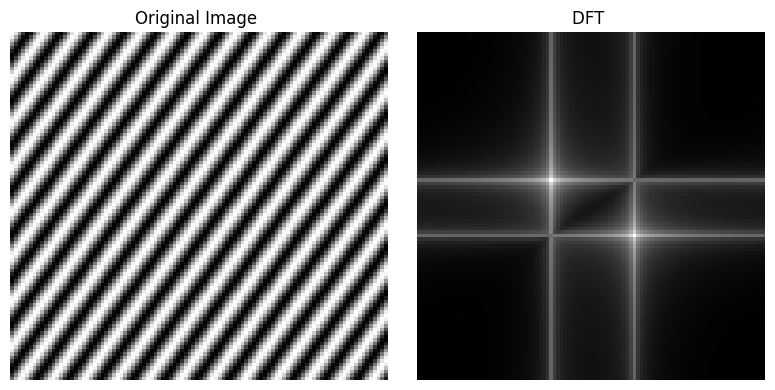

In [ ]:
n_cycle_1 = 11.8
n_cycle_2 =7.8

N = 100
M = 100

f1 = n_cycle_1 / N
f2 = n_cycle_2 / M

# Create 2D coordinate grid
n, m = np.meshgrid(np.arange(N), np.arange(M))

x = np.cos(2 * pi * f1 * n + 2 * pi * f2 * m)


# Display original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(x, cmap='gray', aspect='auto')
plt.title("Original Image ")
plt.axis('off')

X,u,v =perform_fft2(x,M,N)

# Display frequency domain
plt.subplot(1, 2, 2)
plt.imshow(np.log(1+np.abs(X)), cmap='gray',extent=(u.min(), u.max(), v.min(), v.max())
)
plt.title("DFT ")
plt.axis('off')

plt.tight_layout()
plt.show()


See when the lines get compressed in spatial domain, streching occurs in frequency domain

**To remove spectral leakage, we can use hanning window.**

The **Hanning window** is defined as:

$$
w[n] =
\begin{cases}
0.5 \left(1 - \cos\left(\frac{2\pi n}{N - 1}\right)\right), & 0 \leq n \leq N - 1 \\
0, & \text{otherwise}
\end{cases}
$$

where \( N \) is the window length.


In [ ]:
def hann2d(M, N):
    hann_row = np.hanning(M)
    hann_col = np.hanning(N)

    # Outer product to create separable 2D window
    window = np.outer(hann_row, hann_col)
    return window


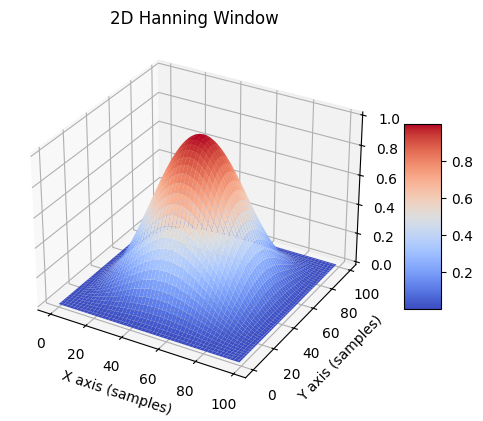

In [ ]:
M, N = 100, 100
window = hann2d(M, N)
n=np.arange(N)
m=np.arange(M)
n, m = np.meshgrid(n, m)
# 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(n, m, window, cmap=cm.coolwarm)

# Customize plot
ax.set_xlabel("X axis (samples)")
ax.set_ylabel("Y axis (samples)")
ax.set_zlabel("Amplitude")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title("2D Hanning Window")
plt.show()

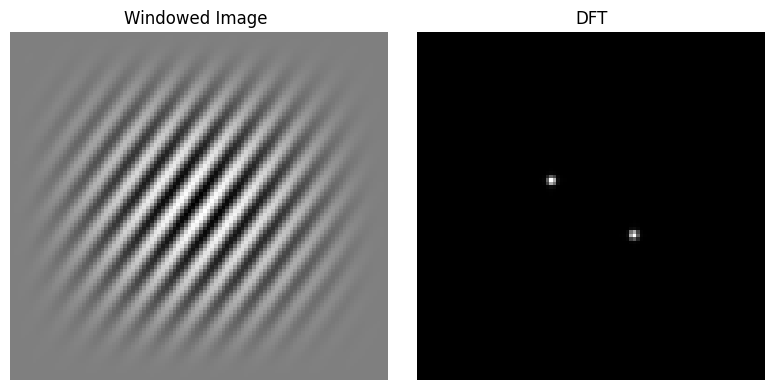

In [ ]:
image_windowed = x * hann2d(M, N)
# Display windowed image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image_windowed, cmap='gray', aspect='auto')
plt.title("Windowed Image ")
plt.axis('off')
# Now perform FFT on the windowed image
X,u,v= perform_fft2(image_windowed,N,M)

# Display frequency domain
plt.subplot(1, 2, 2)
plt.imshow(np.abs(X), cmap='gray')
plt.title("DFT")
plt.axis('off')

plt.tight_layout()
plt.show()

Filtering by hanning window smoothen the image and remove spectral leakage. Should you use it? Depends on your application.

# Filtering

In signal processing, a digital filter is a system that performs mathematical operations on a sampled, discrete-time signal to reduce or enhance certain aspects of that signal, especially in the frequency domain. The question arises why we should filter in frequency domain. It is mainly due to the fact that the complex convolution operation in time domain becomes simple multiplication in frequency domain. Again, we can remove specific frequency components to mitigate noise.

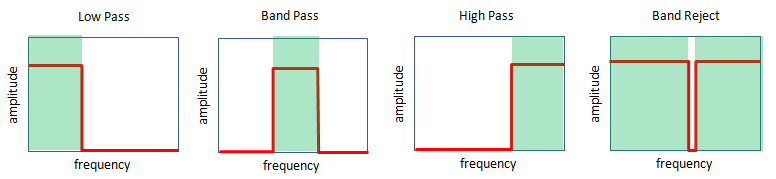

In [ ]:
def plot_sig_and_fft(x, n, X, fk):
    fig = plt.figure(figsize=(16, 8))

    plt.subplot(1, 2, 1)
    plt.plot(n, x)
    plt.xlabel("$n$")
    plt.ylabel("$x[n]$")
    plt.title(f"Signal in time domain")

    plt.subplot(1, 2, 2)
    plt.stem(fk, np.abs(X))
    plt.xlabel("Digital frequncy, f")
    plt.title("Magnitude of X [normalized]")

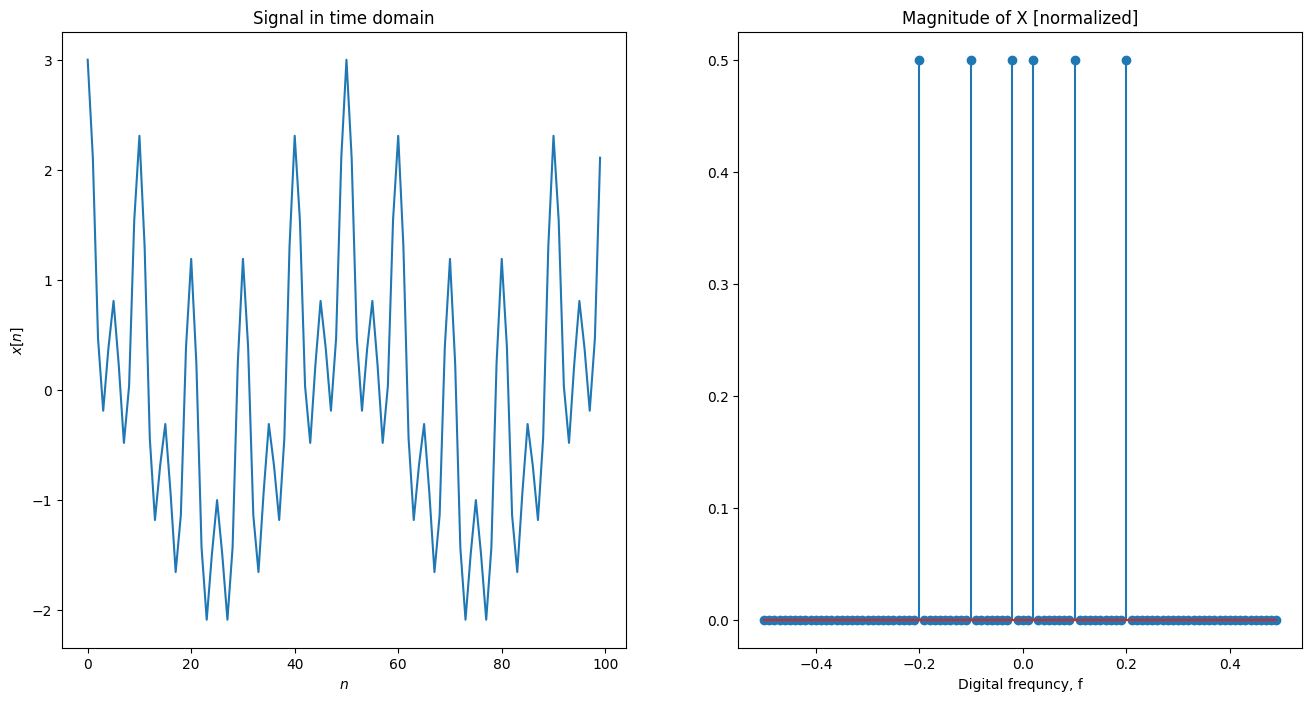

In [ ]:
n_cycles_1 = 2
n_cycles_2 = 10
n_cycles_3 = 20
N = 100

f1 = n_cycles_1/N
f2 = n_cycles_2/N
f3 = n_cycles_3/N
n = np.arange(N)
x = np.cos(2*np.pi*f1*n) + np.cos(2*np.pi*f2*n) + np.cos(2*np.pi*f3*n)

X, fk = perform_fft(x, N)
plot_sig_and_fft(x, n, X, fk)

# Ideal Low-Pass Filter

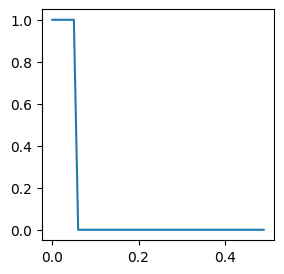

In [ ]:
f_thres = 0.05

H_lp_ideal = np.zeros_like(fk)
H_lp_ideal[np.abs(fk) <= f_thres] = 1

fig = plt.figure(figsize=(3, 3))
plt.plot(fk[fk>=0], H_lp_ideal[fk>=0])

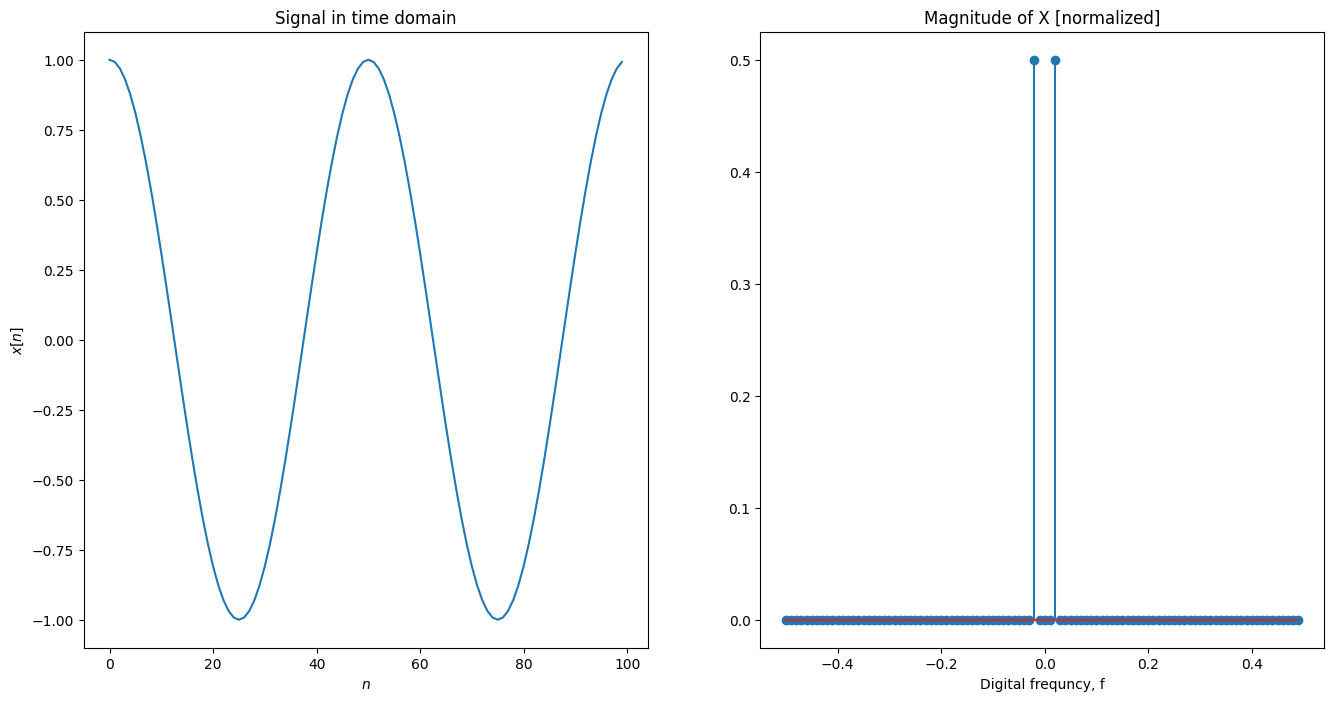

In [ ]:
X_filtered_1 = X*H_lp_ideal
x_recon, n_recon = perform_ifft(X_filtered_1, N)
plot_sig_and_fft(x_recon, n_recon, X_filtered_1, fk)

The original signal had frequencies- 0.02,0.1,0.2. So, after low pass filtering with 0.05 threshold, only one frequency component persists.

# Butterworth Low-Pass Filter

A Butterworth filter of order \( n \) with cutoff frequency \( f_c \) has a magnitude response given by:

$$
H(f) = \frac{1}{\sqrt{1 + \left( \frac{f}{f_c} \right)^{2n}}}
$$

- \( H(f) \): Filter gain at frequency \( f \)  
- \( f_c \): Cutoff frequency  
- \( n \): Filter order — higher \( n \) means sharper roll-off

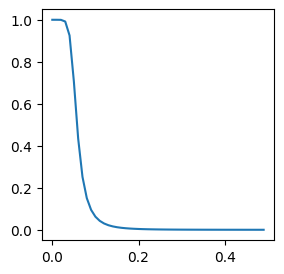

In [ ]:
f_thres = 0.05

N_ord = 4
H_lp_butter = 1/np.sqrt(1 + (fk/f_thres)**(2*N_ord))

fig = plt.figure(figsize=(3, 3))
plt.plot(fk[fk>=0], H_lp_butter[fk>=0])

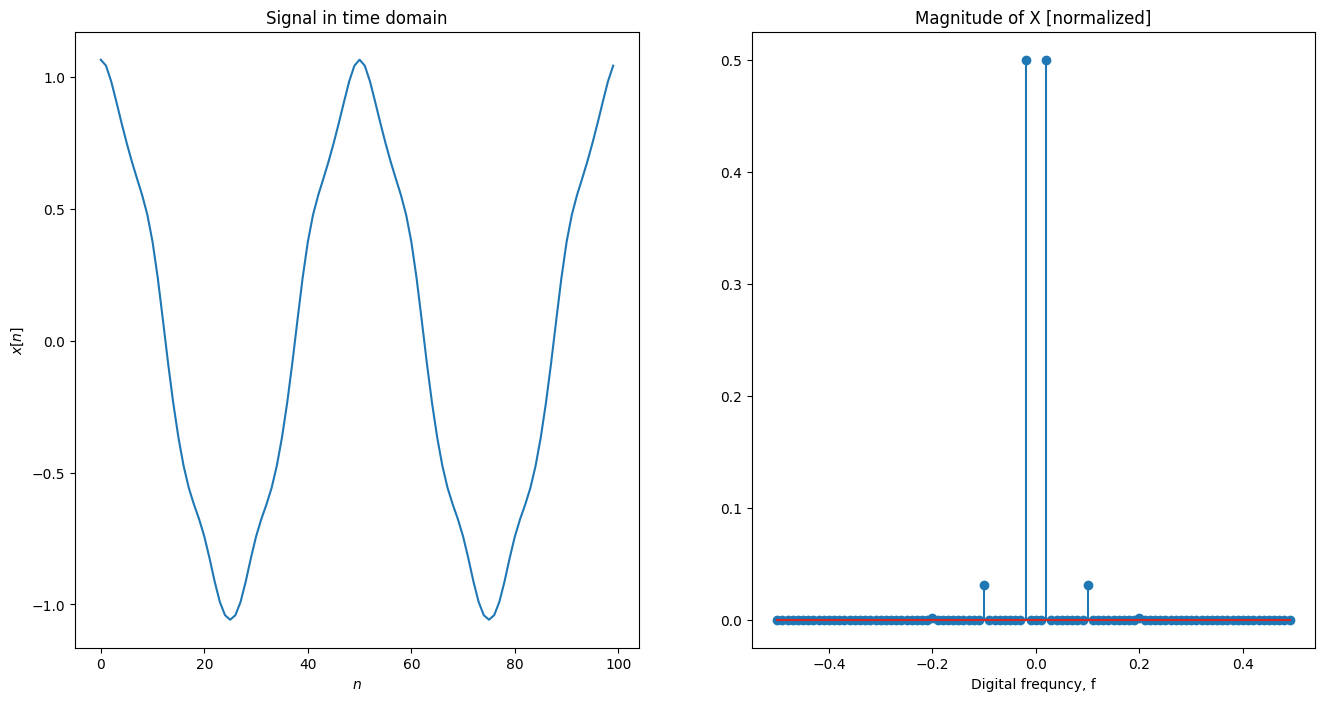

In [ ]:
X_filtered_1 = X*H_lp_butter
x_recon, n_recon = perform_ifft(X_filtered_1, N)
plot_sig_and_fft(x_recon, n_recon, X_filtered_1, fk)

Butterworth filter gives less weight to frequencies outside desired region, doesn't exactly makes zero.

# High-Pass Filter

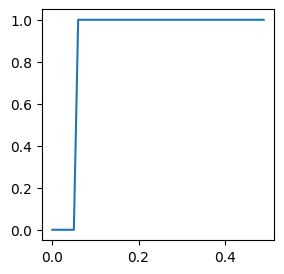

In [ ]:
f_thres = 0.05

H_lp_ideal = np.zeros_like(fk)
H_lp_ideal[np.abs(fk) <= f_thres] = 1

H_hp_ideal = 1 - H_lp_ideal

fig = plt.figure(figsize=(3, 3))
plt.plot(fk[fk>=0], H_hp_ideal[fk>=0])

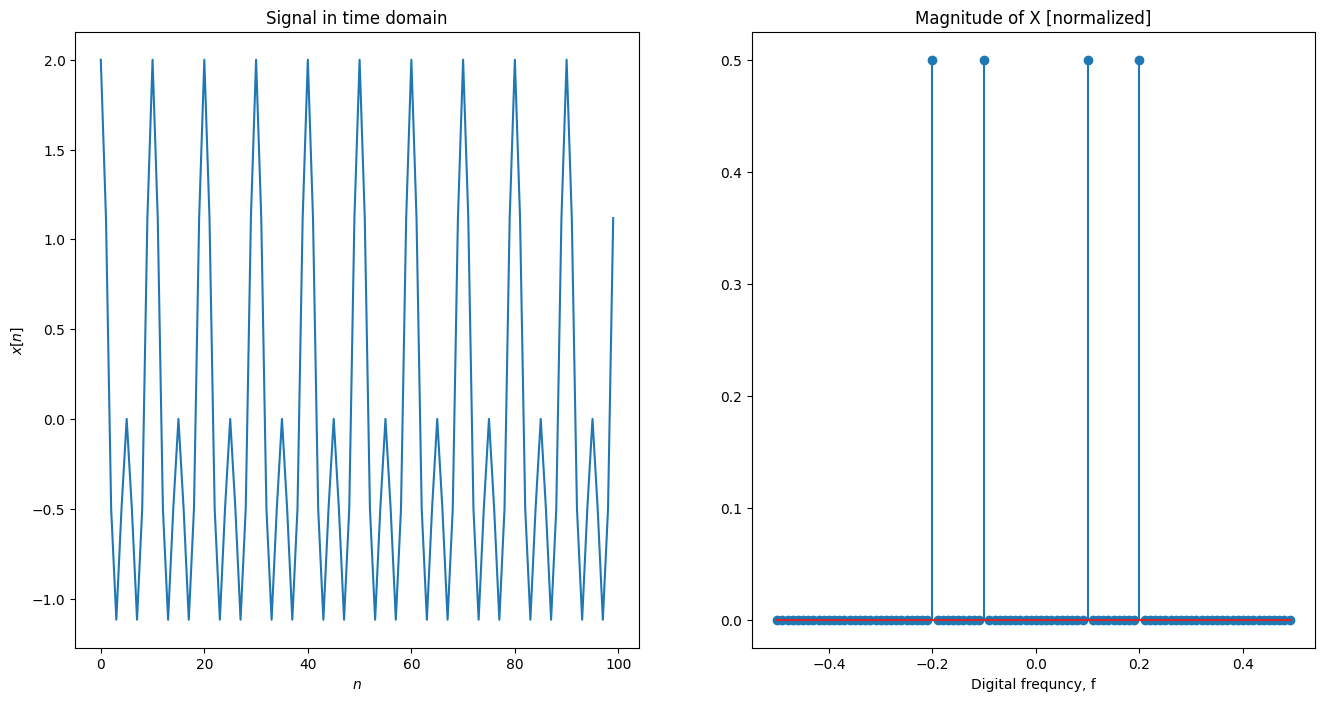

In [ ]:
X_filtered_1 = X*H_hp_ideal
x_recon, n_recon = perform_ifft(X_filtered_1, N)
plot_sig_and_fft(x_recon, n_recon, X_filtered_1, fk)

The original signal had frequencies- 0.02,0.1,0.2. So, after high pass filtering with 0.05 threshold, the two frequency components over 0.05 persist.

### Butterworth

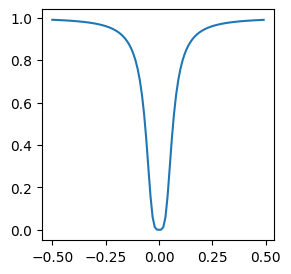

In [ ]:
f_thres = 0.05

N_ord = 2
H_lp_butter = 1/np.sqrt(1 + (fk/f_thres)**(2*N_ord))
H_hp_butter = 1 - H_lp_butter

fig = plt.figure(figsize=(3, 3))
plt.plot(fk, H_hp_butter)

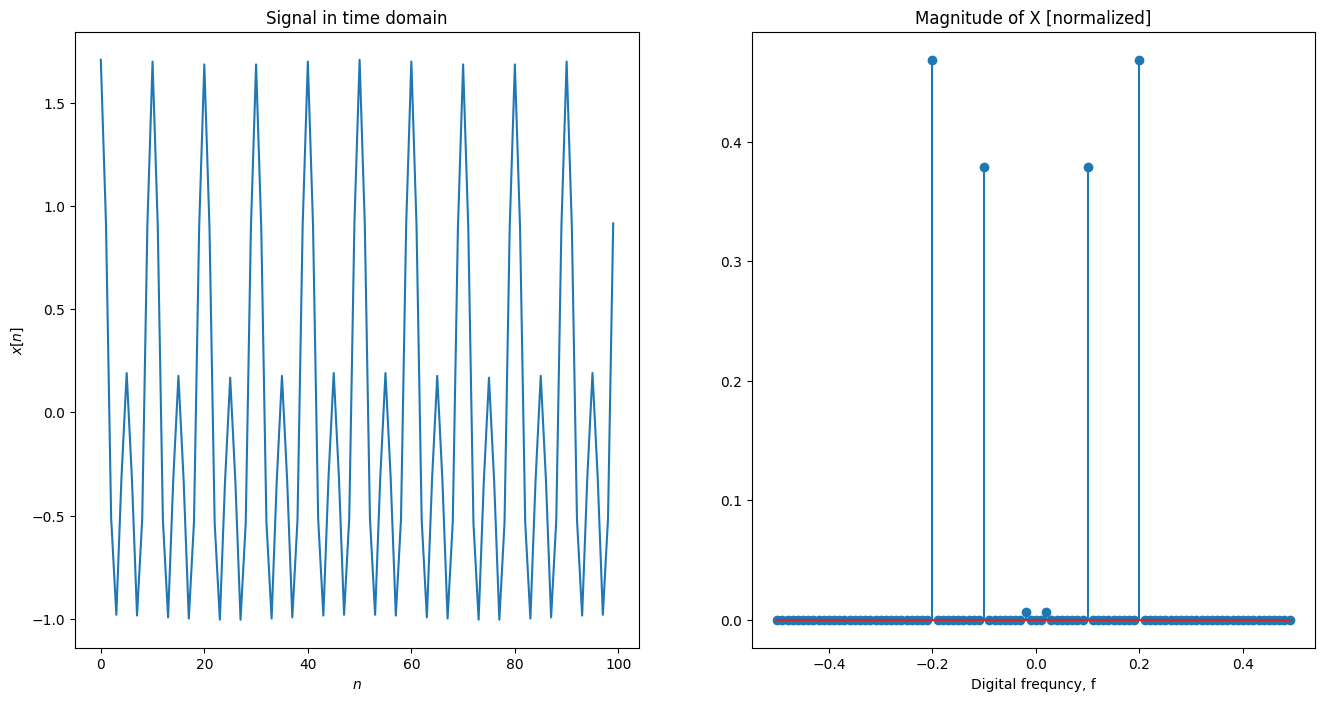

In [ ]:
X_filtered_1 = X*H_hp_butter
x_recon, n_recon = perform_ifft(X_filtered_1, N)
plot_sig_and_fft(x_recon, n_recon, X_filtered_1, fk)

Explore what band-pass and band-stop filters do in the following cells.

### Band-Pass Filter

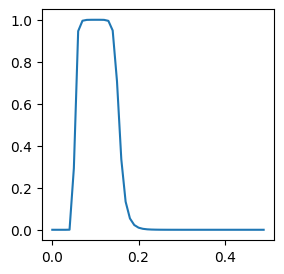

In [ ]:
f_thres_high = 0.15
f_thres_low = 0.05

N_ord = 16
H_lp_1 = 1/np.sqrt(1 + (fk/f_thres_high)**(2*N_ord))
H_lp_2 = 1/np.sqrt(1 + (fk/f_thres_low)**(2*N_ord))
H_bp_butter = H_lp_1 - H_lp_2

fig = plt.figure(figsize=(3, 3))
plt.plot(fk[fk>=0], H_bp_butter[fk>=0])

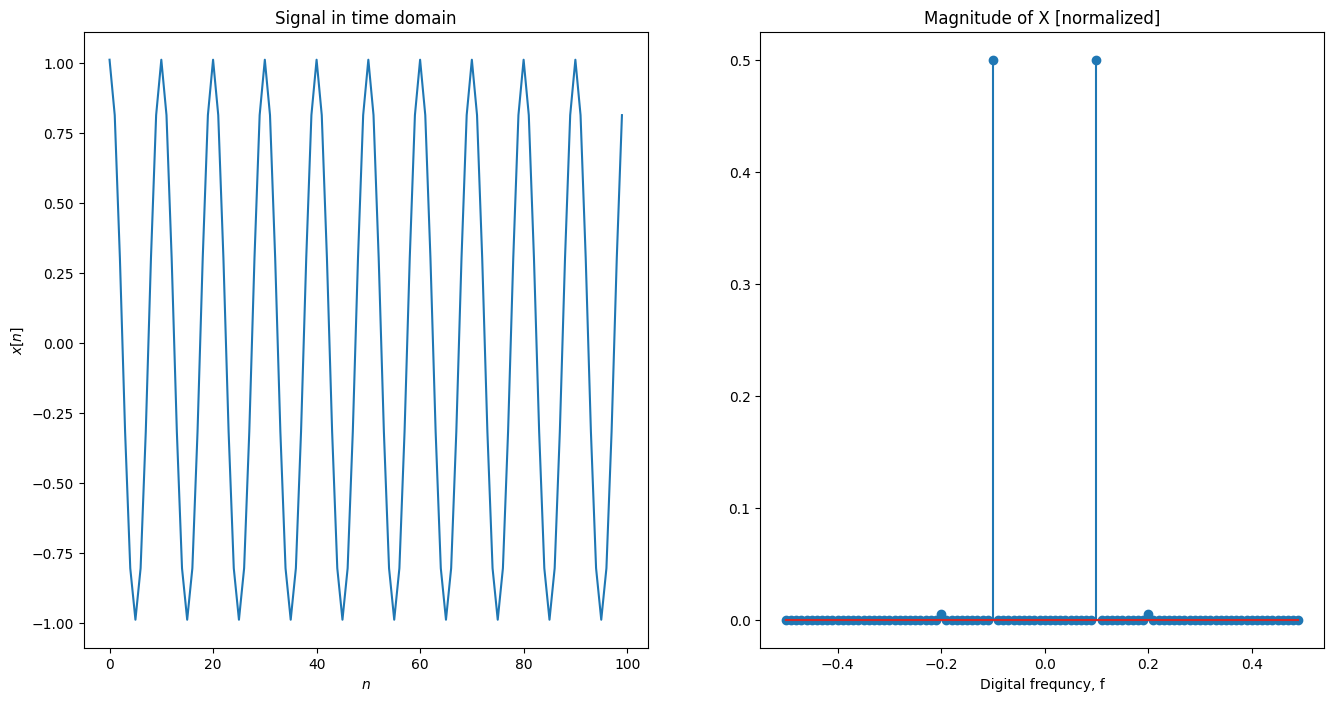

In [ ]:
X_filtered_1 = X*H_bp_butter
x_recon, n_recon = perform_ifft(X_filtered_1, N)
plot_sig_and_fft(x_recon, n_recon, X_filtered_1, fk)

### Bandstop

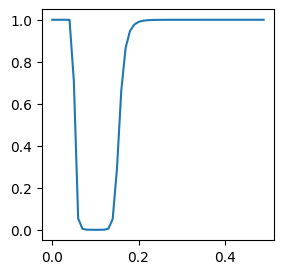

In [ ]:
f_thres_high = 0.15
f_thres_low = 0.05

N_ord = 16
H_lp_1 = 1/np.sqrt(1 + (fk/f_thres_high)**(2*N_ord))
H_lp_2 = 1/np.sqrt(1 + (fk/f_thres_low)**(2*N_ord))
H_bp_butter = H_lp_1 - H_lp_2
H_br_butter = 1 - H_bp_butter

fig = plt.figure(figsize=(3, 3))
plt.plot(fk[fk>=0], H_br_butter[fk>=0])

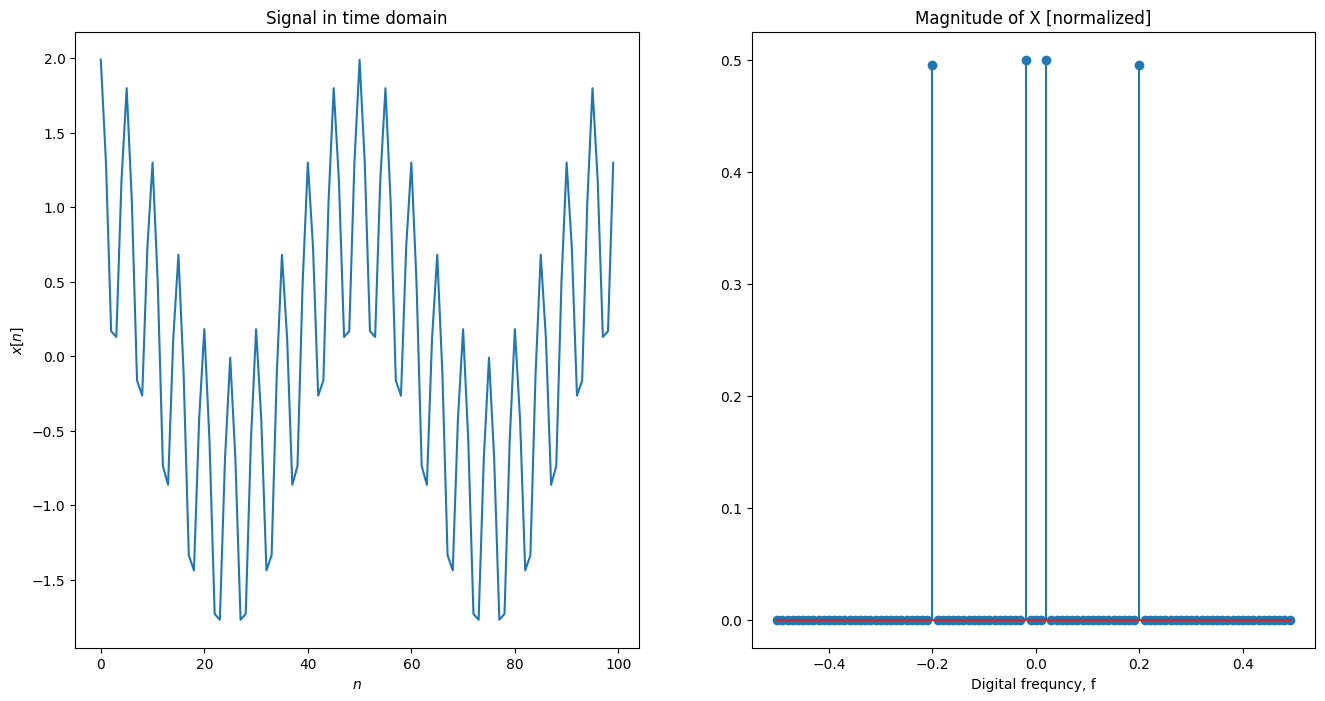

In [ ]:
X_filtered_1 = X*H_br_butter
x_recon, n_recon = perform_ifft(X_filtered_1, N)
plot_sig_and_fft(x_recon, n_recon, X_filtered_1, fk)

# Filtering Image in frequency domain

In [ ]:
from skimage import io,color
# Loading grayscale image
img = io.imread("/content/pretty_little_flower.png")
img=color.rgb2gray(img)
rows, cols = img.shape
X,u,v= perform_fft2(img,rows,cols)

D = np.sqrt(u**2 + v**2)

# Low-pass filter
f_thres = 0.05
N_ord = 8
H_lp = 1 / np.sqrt(1 + (D / f_thres)**(2 * N_ord))

# High-pass filter
f_thres = 0.07
N_ord = 2
H_hp = 1 - (1 / np.sqrt(1 + (D / f_thres)**(2 * N_ord)))

# Band-pass filter
f_thres_low = 0.03
f_thres_high = 0.08
N_ord = 20
H_lp1 = 1 / np.sqrt(1 + (D / f_thres_high)**(2 * N_ord))
H_lp2 = 1 / np.sqrt(1 + (D / f_thres_low)**(2 * N_ord))
H_bp = H_lp1 - H_lp2

# Band-stop filter
H_br = 1 - H_bp



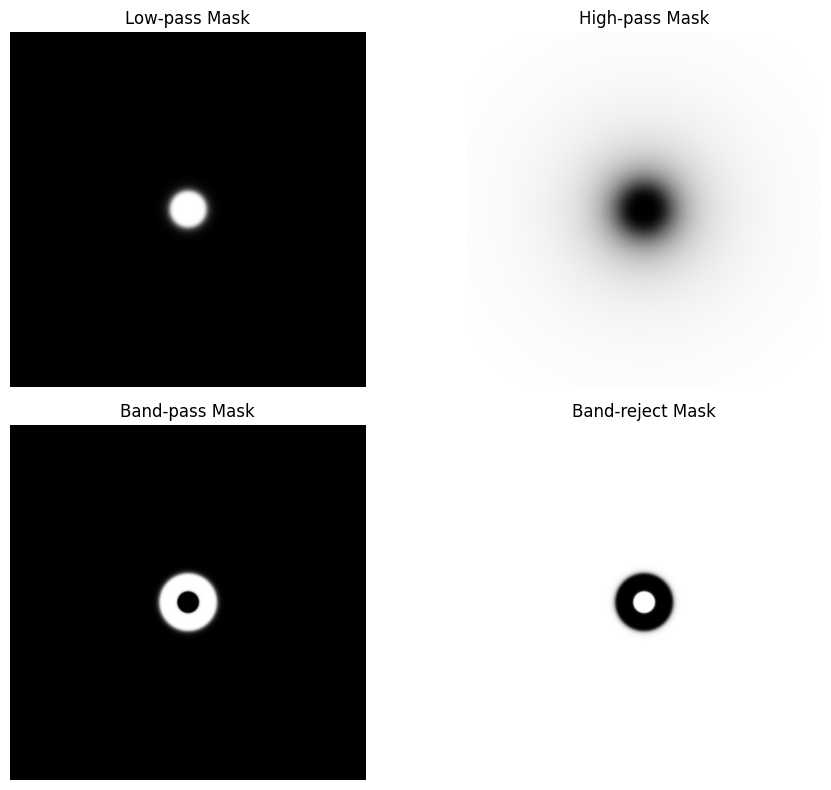

In [ ]:
# Plot the 2D Butterworth filter masks
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(H_lp, cmap='gray')
plt.title("Low-pass Mask")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(H_hp, cmap='gray')
plt.title("High-pass Mask")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(H_bp, cmap='gray')
plt.title("Band-pass Mask")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(H_br, cmap='gray')
plt.title("Band-reject Mask")
plt.axis('off')

plt.tight_layout()
plt.show()


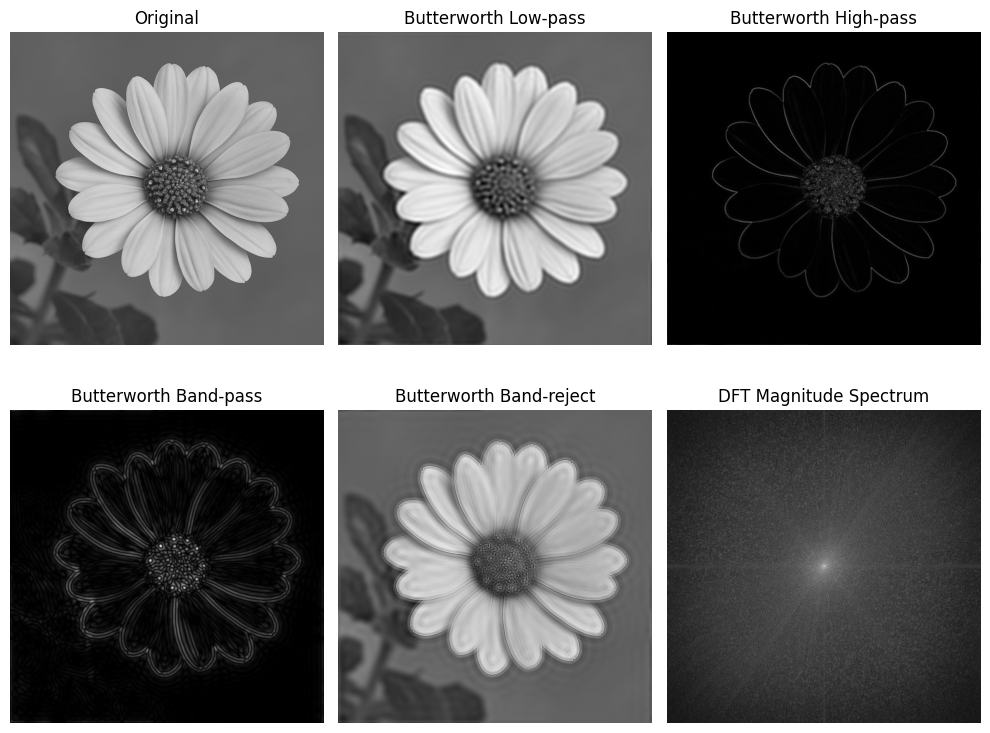

In [ ]:
# Apply filters
def apply_filter(H, X):
    filtered = X * H
    return np.abs(np.fft.ifft2(np.fft.ifftshift(filtered)))

# Filtered results
img_lp = apply_filter(H_lp, X)
img_hp = apply_filter(H_hp, X)
img_bp = apply_filter(H_bp, X)
img_br = apply_filter(H_br, X)

plt.figure(figsize=(10, 8))
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_lp, cmap='gray')
plt.title("Butterworth Low-pass")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_hp, cmap='gray')
plt.title("Butterworth High-pass")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img_bp, cmap='gray')
plt.title("Butterworth Band-pass")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img_br, cmap='gray')
plt.title("Butterworth Band-reject")
plt.axis('off')
plt.subplot(2, 3, 6)

plt.imshow(np.log(1 + np.abs(X)), cmap='gray')

plt.title("DFT Magnitude Spectrum")
plt.axis('off')
plt.tight_layout()
plt.show()


What are the effects of different filters? Try yourself

# RGB Image

In case of RGB image, we have to manually filter each color channel. If we convert the rgb image to grayscale for filtering, color information will be lost.

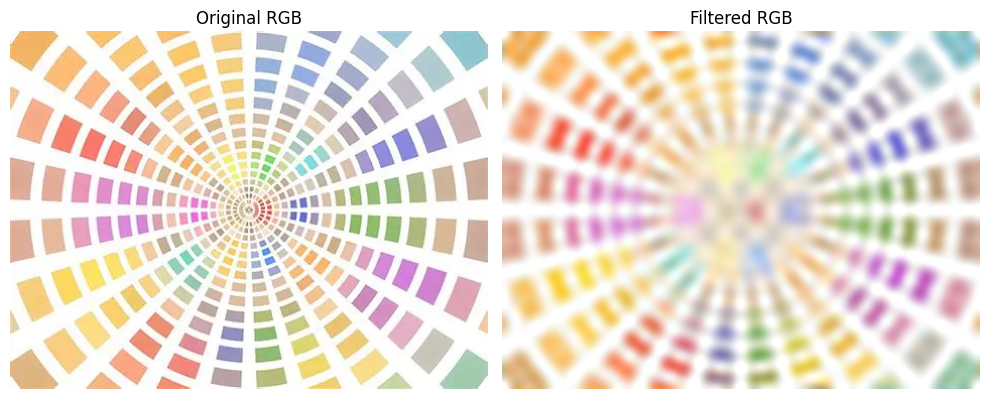

In [ ]:
# Load RGB image
img_rgb = io.imread("/content/random rgb image.png")
img_rgb = skimage.util.img_as_float(img_rgb)   # normalize

rows, cols, _ = img_rgb.shape
u = np.fft.fftshift(np.fft.fftfreq(cols))
v = np.fft.fftshift(np.fft.fftfreq(rows))
U, V = np.meshgrid(u, v)
D = np.sqrt(U**2 + V**2)

# Butterworth band-reject filter
f_low,n = 0.05, 20
H_lp = 1 / np.sqrt(1 + (D / f_low)**(2*n))

# Apply to each channel
filtered_rgb = np.zeros_like(img_rgb)
for i in range(3):
    X = np.fft.fftshift(np.fft.fft2(img_rgb[..., i]))
    Xf = X * H_lp
    filtered_rgb[..., i] = np.abs(np.fft.ifft2(np.fft.ifftshift(Xf)))


plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Original RGB"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(filtered_rgb); plt.title("Filtered RGB"); plt.axis("off")
plt.tight_layout(); plt.show()

One idea is to convert the RGB image to a different color space where a channel will be for intensity and we will filter only that channel keeping other channels intact. Then we can convert back to rgb.

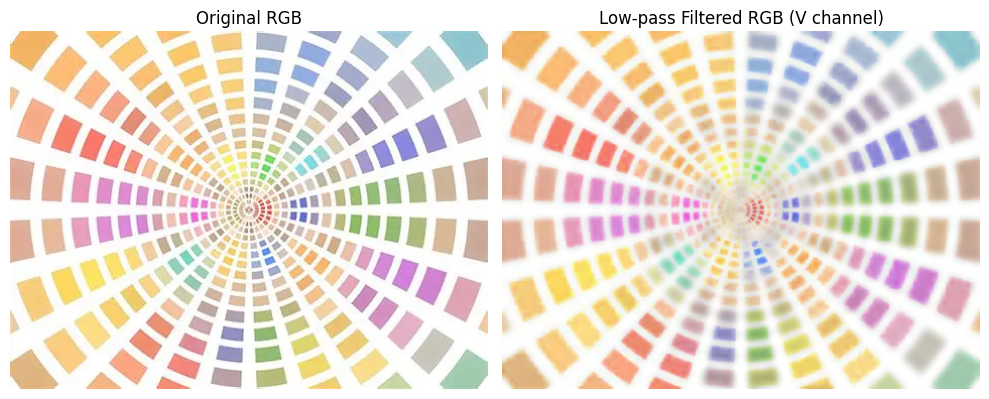

In [ ]:
# Convert to HSV color space
img_hsv = color.rgb2hsv(img_rgb)
H, S, V = img_hsv[...,0], img_hsv[...,1], img_hsv[...,2]

rows, cols = V.shape
X = np.fft.fftshift(np.fft.fft2(V))

# Frequency grid
u = np.fft.fftshift(np.fft.fftfreq(cols))
v = np.fft.fftshift(np.fft.fftfreq(rows))
U, V = np.meshgrid(u, v)
D = np.sqrt(U**2 + V**2)

# Butterworth Low-Pass Filter
f_thres = 0.05    # cutoff frequency
N_ord = 4         # order
H_lp = 1 / np.sqrt(1 + (D / f_thres)**(2 * N_ord))

# Apply filter to the Value channel
X_filtered = X * H_lp
V_filtered = np.abs(np.fft.ifft2(np.fft.ifftshift(X_filtered)))

# Replace V channel with filtered version
img_hsv_filtered = img_hsv.copy()
img_hsv_filtered[...,2] = np.clip(V_filtered, 0, 1)

# Convert back to RGB
img_rgb_filtered = color.hsv2rgb(img_hsv_filtered)

# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original RGB")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_rgb_filtered)
plt.title("Low-pass Filtered RGB (V channel)")
plt.axis("off")

plt.tight_layout()
plt.show()


What will happen if we don't convert back to rgb? Find out by exploring on your own.